In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/MyDrive/BDP')
print(os.getcwd())

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/BDP


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'

Rating WordCloud

In [ ]:
reviews = pd.read_csv('coupang_reviews.csv', encoding='utf-8', sep='\t')
reviews

,rating,headline,review_content
0,5,만족합니다,가성비도 좋아요 재구매 의사있어요
1,5,가성비 싸게샀어요 이뻐요 ㅎㅎ,등록된 리뷰내용이 없습니다
2,4,가성비 완전 대박!,가방이랑 볼이 정품이라 만족스럽습니다 다른 제품들은 잘살펴보면 정품이 아닌경우들이 ...
3,4,골린이에게 적당한 골프채^^,"골프채 드라이버 및 쿼터, 우드 아이언포함하여 10개 잘 받았습니다. 하자는 없어요..."
4,5,저처럼 골프 입문하신지 얼마 되지 않으신 분들 강추!,스크린으로 처음 골프 입문한 골린이입니다. 하우스 채로 만 치다 보니 내채가 필요하...
...,...,...,...
1599568,5,신경과 근육 기능 유지를위해 꾸준히 먹어요.,등록된 리뷰내용이 없습니다
1599569,5,마그네슘 함량이 많아서 좋습니다,등록된 리뷰내용이 없습니다
1599570,5,재 구매했어요,등록된 리뷰내용이 없습니다
1599571,5,다른건 모르겠고 수면의 질은 완전 좋아졌습니다,깊은 잠을 못자서 항상 피곤하고 졸렸는데마그네슘 먹고나서 진짜 효과 바로 느끼고 있...


In [ ]:
reviews_rating5 = reviews[reviews['rating'].isin(['5'])]
reviews_rating4 = reviews[reviews['rating'].isin(['4'])]

reviews_positive = reviews[reviews['rating'].isin(['5'])]
reviews_negative = reviews[reviews['rating'].isin(['1', '2', '3'])]

In [ ]:
reviews = reviews_negative
reviews['rating'] = reviews['rating'].astype('int')

In [ ]:
# headline, review_content 모두 결측치 있는 row 제거
reviews = reviews[reviews[['headline','review_content']].isnull().sum(axis=1) == 0]

In [ ]:
# headline, review_content 모두 내용이 없는 row
reviews[reviews['headline'].str.contains('등록된 헤드라인이') & reviews['review_content'].str.contains('등록된 리뷰내용이')]

,rating,headline,review_content


In [ ]:
reviews['rating'].value_counts().sort_index(ascending=False)

2    29309
1    51292
Name: rating, dtype: int64

In [ ]:
# '등록된 헤드라인이 없습니다' 포함한 headline 빈 문자열로 변경
# '등록된 리뷰내용이 없습니다' 포함한 review_content 빈 문자열로 변경
reviews['headline'] = np.where(reviews['headline'].str.contains('등록된 헤드라인이'), '', reviews['headline'])
reviews['review_content'] = np.where(reviews['review_content'].str.contains('등록된 리뷰내용이'), '', reviews['review_content'])

In [ ]:
# headline, review_content 공백을 기준으로 합치기
reviews['content'] = reviews['headline'] + " " + reviews['review_content']
reviews = reviews[['rating', 'content']].reset_index(drop=True)

In [ ]:
# 중복된 리뷰 제거
print(reviews.duplicated(subset=['rating', 'content']).sum())
print(len(reviews))
reviews.drop_duplicates(subset=['rating', 'content'], keep='first', inplace=True)
print(len(reviews))

30277
80601
50324


In [ ]:
print(len(reviews))
print(reviews.iloc[75])

94312
rating                                                     2
content     솔직히 A급은 기대안했지만 이건 좀... 스크라치는 기본이고 패인것도 많고 급한마...
Name: 82, dtype: object


In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share

In [ ]:
!pip install konlpy

In [ ]:
# 전체 데이터에서 무작위로 1만개의 샘플 추출
# sample_reviews = reviews.sample(n=10000, random_state=1)

# 'content' 열에서 모든 리뷰 내용을 결합하여 하나의 텍스트 생성
text = ' '.join(reviews['content'].astype(str))


In [ ]:
from konlpy.tag import Komoran, Okt, Kkma
import re

# Okt 형태소 분석기 초기화
okt = Okt()

# 형태소 분석 및 불용어 처리
morphs = okt.pos(text)
nouns = [word for word, pos in morphs if pos in ['Noun']]

In [ ]:
# 불용어 처리
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords.extend(['쿠팡', '리뷰'])

filtered_nouns = [word for word in nouns if word not in stopwords and len(word) > 1]

In [ ]:
from collections import Counter

# 모든 단어 빈도수 계산
word_freq = Counter(filtered_nouns)
top_words = dict(word_freq.most_common(100))

In [ ]:
# 빈도수가 높은 상위 단어들로 텍스트 생성
# text = ' '.join([word for word in filtered_nouns if word in top_words])

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


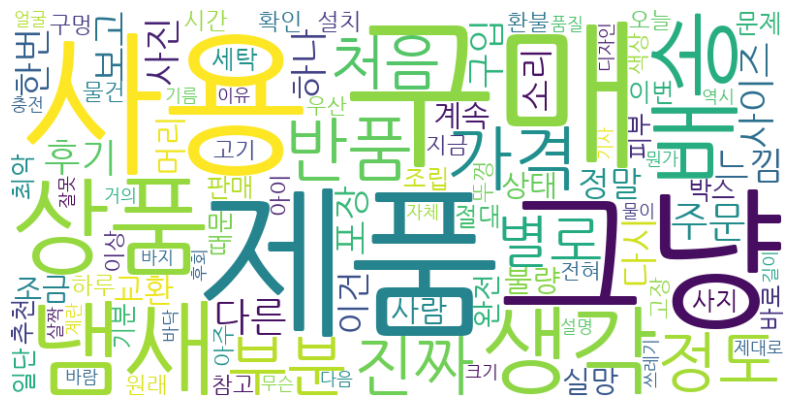

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 폰트 경로 설정 (예시: 나눔고딕 폰트)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(top_words)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()